In [1]:
import os, shutil

In [2]:
original_dataset_dir = 'D:\CNN'

In [3]:
base_dir = 'D:\CNN\CATS_DOG'

In [4]:
train_dir = os.path.join(base_dir, 'train')

In [5]:
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [6]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [8]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])


In [9]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
validation_dir,
    target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 49s 495ms/step - loss: 0.6963 - acc: 0.5470 - val_loss: 0.6803 - val_acc: 0.5220
Epoch 2/30
100/100 [==============================] - 22s 225ms/step - loss: 0.6514 - acc: 0.6205 - val_loss: 0.6364 - val_acc: 0.6370
Epoch 3/30
100/100 [==============================] - 23s 227ms/step - loss: 0.6200 - acc: 0.6650 - val_loss: 0.6313 - val_acc: 0.6410
Epoch 4/30
100/100 [==============================] - 23s 231ms/step - loss: 0.5796 - acc: 0.6995 - val_loss: 0.5943 - val_acc: 0.6850
Epoch 5/30
100/100 [==============================] - 23s 230ms/step - loss: 0.5472 - acc: 0.7190 - val_loss: 0.5804 - val_acc: 0.6960
Epoch 6/30
100/100 [==============================] - 23s 229ms/step - loss: 0.5185 - acc: 0.7485 - val_loss: 0.5901 - val_acc: 0.6870
Epoch 7/30
100/100 [==============================] - 23s 229ms/step - loss: 0.4873 - acc: 0.7660 - val_loss: 0.5907 - val_acc: 0.6820
Epoch 8/30
100/100 [==============================] - 2

In [12]:
model.save('cats_and_dogs_small_1.h5')

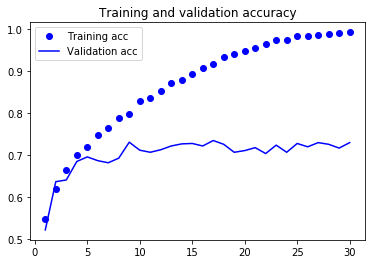

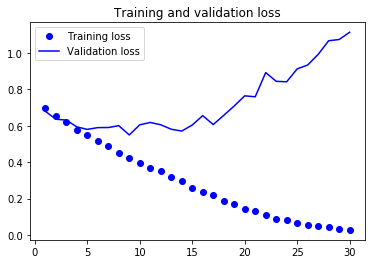

In [14]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [1]:
from keras.models import load_model

Using TensorFlow backend.


In [6]:
from matplotlib.image import imread
import numpy as np

img = imread('D:\CNN\cat.1985.jpg')
img = img[:150,:150,:]
img=np.expand_dims(img, axis=0)
print(img.shape)

(1, 150, 150, 3)


In [4]:
model = load_model('cats_and_dogs_small_1.h5')

In [5]:
model.predict(img)

array([[0.]], dtype=float32)